# Nifty analysis: 2003 Jan - 2020 April
This is a very basic analysis of the Indian Stock Market Index NIFTY 50.  
objective is to learn data analysis, wrangling and visualization using Python.  
Prepared a spreadsheet of Nifty and Dividend yield values.

In [1]:
#Importing libraries
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# install xlrd to read spreadsheets
!pip install xlrd
import xlrd
print('xlrd installed!')

xlrd installed!


In [3]:
# reading excel file into data frame
df_nifty = pd.read_excel('Nifty50.xlsx',
                       sheet_name='Nifty')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
# checking data frame
df_nifty.head()

,Date,Nifty,Div Yield
0,2003-01-01,1100.15,2.38
1,2003-01-02,1093.05,2.40
2,2003-01-03,1089.60,2.40
3,2003-01-06,1084.35,2.42
4,2003-01-07,1081.80,2.42


In [5]:
# view df details
df_nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4302 entries, 0 to 4301
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4302 non-null   datetime64[ns]
 1   Nifty      4302 non-null   float64       
 2   Div Yield  4302 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 101.0 KB


In [6]:
# import required libraries for graph plot
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__ )

# choosing plot style
print(plt.style.available)
mpl.style.use(['ggplot'])

Matplotlib version:  3.3.2
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Analysis 1: Simple NIFTY 50 chart
Now that we have historical values of NIFTY 50 Index, let’s plot this into a graph  



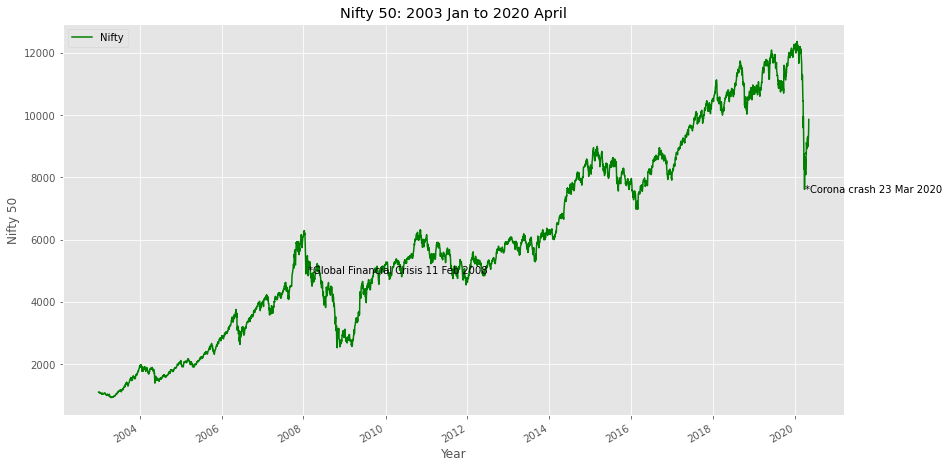

In [36]:
# creating new dataframe graphdf with 2 columns Date and Nifty
graphdf=df_nifty[['Date','Nifty']]

# plotting the line chart with 'Date' as X axis
graphdf.set_index('Date').plot(kind='line',figsize=(14,8),color='green')
plt.title('Nifty 50: 2003 Jan to 2020 April')
plt.xlabel('Year')
plt.ylabel('Nifty 50')
plt.text('2008-02-11',4899,'*Global Financial Crisis 11 Feb 2008')
plt.text('2020-03-23',7511.10,'*Corona crash 23 Mar 2020')
plt.savefig('pic01.png')
plt.show()

  
**Observations**:

    The general trend of the index is upwards
    There is a high level of volatility, i.e, most often, the index goes sideways

# Analysis 2: Daily movements
We can calculate the daily changes in index value and count the number of days when NIFTY 50 advanced or declined 

In [8]:
# creating a new dataframe for tracking percentage change and direction of daily Nifty50 values

# copying original dataframe
df2=df_nifty.copy()

# adding 3 new empty columns
df2['Change']=""
df2['Per_ch']=""
df2['Direction']=""

# counting number of rows
var_rows=len(df2.index)

# filling new columns
# column 'Change' contains absolute daily movements
# column 'Per_ch' contains percentage change
# column 'Direction' notes whether Nifty declined or advanced
for i in range(1, var_rows):
    df2.loc[i,'Change']=df2.loc[i,'Nifty']-df2.loc[i-1,'Nifty']
    df2.loc[i,'Per_ch']=df2.loc[i,'Change']*100/df2.loc[i-1,'Nifty']
    if (df2.loc[i,'Change']>0):
        df2.loc[i,'Direction']='Advanced'
    elif (df2.loc[i,'Change']<0):
        df2.loc[i,'Direction']='Declined'
    else:
        df2.loc[i,'Direction']='No Change'

# Dropping the first row from df2, where difference is unavailable
df2=df2.drop(index=0)
df2.head()

,Date,Nifty,Div Yield,Change,Per_ch,Direction
1,2003-01-02,1093.05,2.40,-7.1,-0.645367,Declined
2,2003-01-03,1089.60,2.40,-3.45,-0.315631,Declined
3,2003-01-06,1084.35,2.42,-5.25,-0.481828,Declined
4,2003-01-07,1081.80,2.42,-2.55,-0.235164,Declined
5,2003-01-08,1089.35,2.41,7.55,0.697911,Advanced


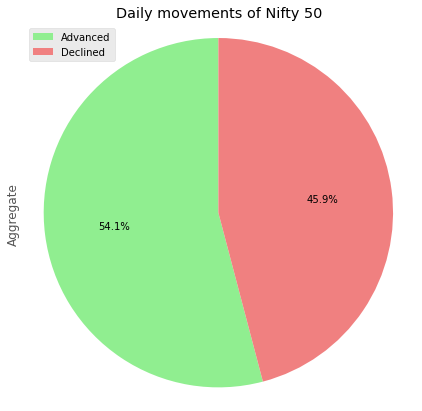

In [9]:
# to plot Advances vs Declines of Nifty daily changes

# counting number of Advanced and Declined days
count_adv=len(df2[df2['Direction']=='Advanced'])
count_dec=len(df2[df2['Direction']=='Declined'])

# creating a 2D list graphlist
graphlist=[['Advanced',count_adv],['Declined',count_dec]]

# creating a dataframe graphdf with the 2D list created
graphdf = pd.DataFrame(graphlist, columns = ['Change', 'Aggregate'])
# plotting the Pie chart
colors_list = ['lightgreen', 'lightcoral']
graphdf.set_index('Change')['Aggregate'].plot(kind='pie',
                                              figsize=(7,7),
                                              autopct='%1.1f%%',
                                              labels=None,
                                              colors=colors_list,
                                              startangle=90)
plt.title('Daily movements of Nifty 50')
plt.axis('equal')
plt.legend(labels=graphdf['Change'], loc='upper left') 
plt.savefig('pic02.png')
plt.show()


 
  
**Observation**:

Even though NIFTY 50 went up more number of days than it went down in the period of observation, the difference is not that great
  
**Takeaways**:
  
Holding NIFTY 50 for a day hoping to make a profit has a slightly higher probability than predicting a fair coin toss. Accounting for fees and brokerage, the probability of making a profit will reduce further

# Analysis 3: More on daily movements
We can not get a full picture by just observing whether the market has advanced or declined,  we have to account for how much it changed as well. We will use ‘Box Plot’, which will be useful for this purpose.  
  



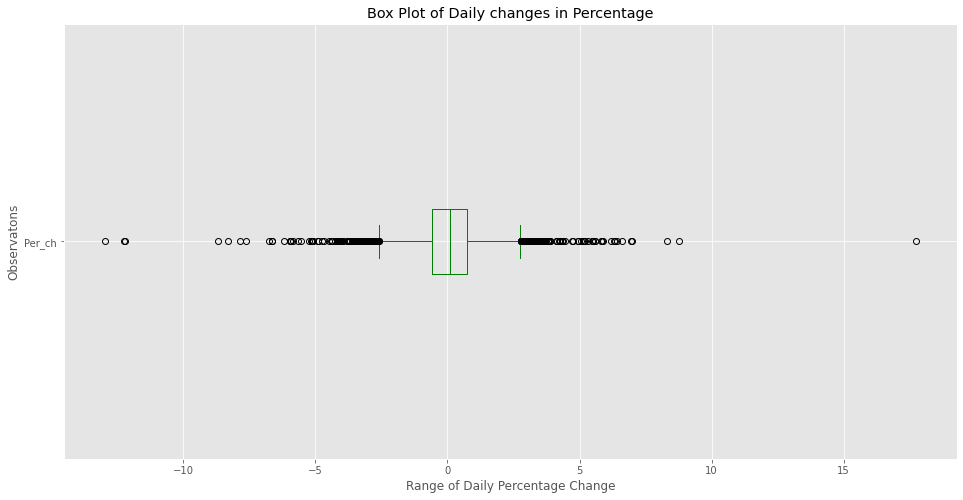

In [10]:
# to draw Boxplot of daily moving percentages

graphdf=df2[['Date','Per_ch']]
graphdf.set_index('Date')['Per_ch'].plot(kind='box',figsize=(16,8),color='green',vert=False)
plt.title('Box Plot of Daily changes in Percentage')
plt.xlabel('Range of Daily Percentage Change')
plt.ylabel('Observatons')
plt.savefig('pic03.png')
plt.show()

**Observations**:

    The plot is somewhat symmetrical
    There are a few outliers in both left and right side
    

**Let’s plot another Boxplot without ‘outliers’ for better focus on the majority of observations**
  



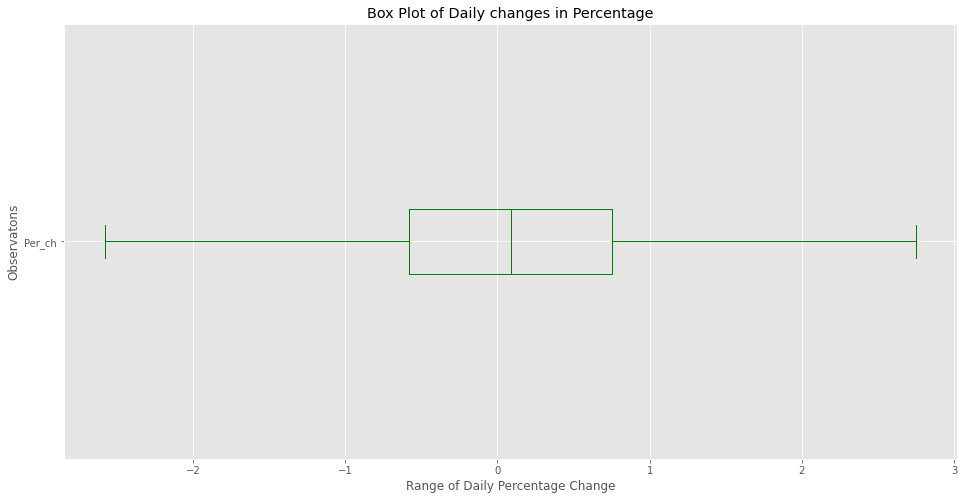

In [11]:
# to draw Boxplot of daily moving percentages without outliers

#graphdf=df2[['Date','Per_ch']]
graphdf.set_index('Date')['Per_ch'].plot(kind='box',figsize=(16,8),color='green',vert=False,showfliers=False)
plt.title('Box Plot of Daily changes in Percentage')
plt.xlabel('Range of Daily Percentage Change')
plt.ylabel('Observatons')
plt.savefig('pic04.png')
plt.show()


In [12]:
# print median, first quartile and 3rd quartile

boxmedian=np.median(df2[['Per_ch']])
boxfirst=np.percentile(df2[['Per_ch']], 25)
boxthird=np.percentile(df2[['Per_ch']], 75)
boxmin=np.percentile(df2[['Per_ch']], 0)
boxmax=np.percentile(df2[['Per_ch']], 100)
print("First Quartile:",str(boxfirst),
      "\nMedian:",str(boxmedian),
      "\nThird Quartile:",str(boxthird),
     "\nMinimum:",str(boxmin),
     "\nMaximum:",str(boxmax))

First Quartile: -0.5814020225673686 
Median: 0.08928530123381605 
Third Quartile: 0.7555723460521344 
Minimum: -12.980464127060364 
Maximum: 17.744066019364578


**Observations**:

    The median value of daily change is 0.089%.
    On 50% of days, NIFTY 50 closed in the range of -0.58% to 0.76% from the previous day
    Excluding outliers, most of the days NIFTY 50 closed in the range of -2.5% to 2.7%
    There are days in which NIFTY 50 went down -12.98% or went up 17.74%

# Analysis 4: Include Dividends
As we have seen, Dividends are additional income at the hand of investors. To include the effect of dividends, there are ‘Total Return Indices’ for each normal index. A Total Return Index, TRI represents the value of the index, if we invest back all the dividends credited.  

**How the TRI is calculated**  
Only the data available at the source is used to calculate TRI. This should be approximate, but not-
necessarily mean exact TRI index. Method used to calculate TRI in the analysis is given below:  
Total number of observations are 4302, as this is the data for 17yrs and 4months, there are 248.19 data-
on average for 1 year (rest are market holidays)
We have dividend yield values, which shows the dividend received by index companies in the past 1 year.
There are 2 ways to incorporate this into TRI. one is to pick a specific day in each year and assume-
on that day, all of the past dividends are reinvested. Another method is to assume dividends are being-
reinvested everyday as per dividend yield.This reinvestment should be (1/[trading days in an year])-
so that net reinvestment in an year is approximately equal to net dividend yield for that year.

In [13]:
# to create a new Total Return Index, including dividends
# copying original dataframe
df_nifty_tri=df_nifty.copy()

# adding 3 new empty columns
df_nifty_tri['Nifty_Base_100']=""
df_nifty_tri['Div_add']=""
df_nifty_tri['NiftyTRI']=""

# counting number of rows
var_rows=len(df_nifty_tri.index)

# selecting first value for crating base100 index
base_val=df_nifty_tri.loc[0,'Nifty']

# setting up a factor to account dividend
# the data is for 208 months, hence total trading days = total rows / (208/12)
trading_days=var_rows/(208/12)
# Dividend yield for a day thus constitues addition of [Nifty value]*[Dividend yield]/trading days
for i in range(0, var_rows):
    df_nifty_tri.loc[i,'Nifty_Base_100']=df_nifty_tri.loc[i,'Nifty']*100/base_val
    df_nifty_tri.loc[i,'Div_add']=df_nifty_tri.loc[i,'Nifty']*df_nifty_tri.loc[i,'Div Yield']/(100*trading_days)
    if(i==0):
        df_nifty_tri.loc[i,'NiftyTRI']=100
    else:
        df_nifty_tri.loc[i,'NiftyTRI']=((df_nifty_tri.loc[i,'Nifty']+df_nifty_tri.loc[i,'Div_add'])/df_nifty_tri.loc[i-1,'Nifty'])*df_nifty_tri.loc[i-1,'NiftyTRI']

df_nifty_tri.head()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI
0,2003-01-01,1100.15,2.38,100,0.105497,100
1,2003-01-02,1093.05,2.40,99.3546,0.105697,99.3642
2,2003-01-03,1089.60,2.40,99.041,0.105363,99.0602
3,2003-01-06,1084.35,2.42,98.5638,0.10573,98.5925
4,2003-01-07,1081.80,2.42,98.332,0.105481,98.3702


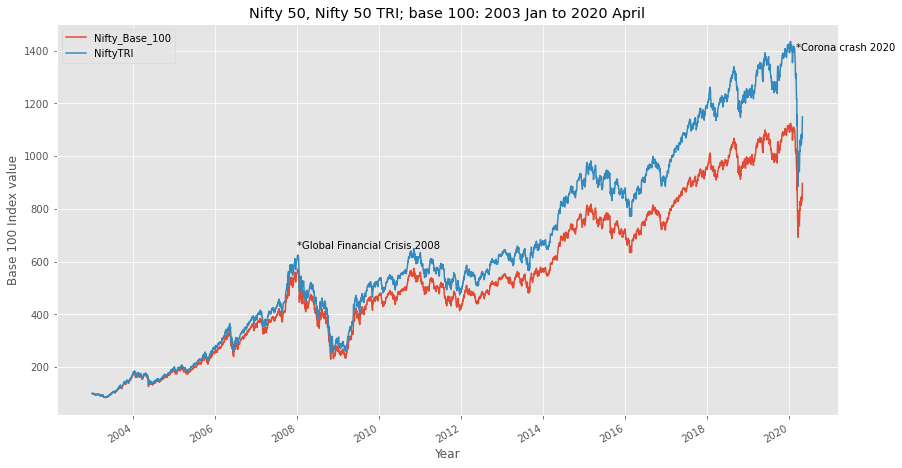

In [14]:
# plotting the line chart with 'Date' as X axis, 'Nifty and Nifty TRI with base 100' in Y axis

# creating new dataframe with required columns
graphdf=df_nifty_tri[['Date','Nifty_Base_100','NiftyTRI']]
graphdf.set_index('Date').plot(kind='line',figsize=(14,8))
plt.title('Nifty 50, Nifty 50 TRI; base 100: 2003 Jan to 2020 April')
plt.xlabel('Year')
plt.ylabel('Base 100 Index value')
plt.text('2008-01-01',650,'*Global Financial Crisis 2008')
plt.text('2020-03-01',1400,'*Corona crash 2020')
plt.savefig('pic05.png')
plt.show()

Note: Initial values of both NIFTY 50 and NIFTY 50 TRI have been set to 100 for comparison.  

**Observations**:

    ₹100 invested in NIFTY 50 on 1st Jan 2003 is worth ₹896 as on 30th Apr 2020
    ₹100 invested in NIFTY 50 on 1st Jan 2003 is worth ₹1149 as on 30th Apr 2020, if the dividends were reinvested
  
**Takeaways**:

    For a long term investor, it is always better to reinvest dividends, assuming there is no need for cash flow in the accumulation phase.
    Even small addition to investments can make a big difference in the long term



In [15]:
# let's have a look at the final values of Nifty Base 100 and Nifty TRI
# This represents values of 100RS invested without and with dividends re-invested
df_nifty_tri.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75


# Analysis 5: Averaging
One of the ways to reduce volatility in index movements is to average them. This should cancel out some changes and we should get a smoother graph.  

Note: this will be rolling averages. That is, except for the initial year of data (2003 in this case), there will be a one-year average for every business day. For example:  

1 year average for 2004 Feb 7 = average of values from 2003 Feb 8 to 2004 Feb 7  
  
1 year average for 2004 Feb 8 = average of values from 2003 Feb 9 to 2004 Feb 8  
  
Let’s make a new chart with 1-year average values for each day.

In [16]:
# creating new dataframe for 1 year average

'''
How duration is calculated
Ideally, we should look into the ‘date’ field for selecting exact dates when 1,3 or 5year analysis is-
required, however, in this done by approximate number of trading days in this analysis. E.g: 249th data-
is considered as data after 1 year. This helps to simplify calculations, also as all the calculations of-
1year or longer are of rolling nature, a change in 1 day will cause approximate 1/248 of that change in-
a 1year average calculation, 1/745 for a 3year average calculation.

'''

# copying total return index
df_nifty_tri_1y=df_nifty_tri.copy()

# adding new empty column 1y_avg
df_nifty_tri_1y['1y_avg']=""

# working out 4302 rows for 17 years and 4 months; on average 248 trading days are in an year
# calculating rolling 1Y average on every day starting 249th row
for i in range(248, var_rows):
    df_nifty_tri_1y.loc[i,'1y_avg']=np.mean(df_nifty_tri_1y.loc[i-248:i,'NiftyTRI'])

    
df_nifty_tri_1y.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,1y_avg
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28,1311.19
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25,1310.11
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81,1309.14
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97,1308.27
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75,1307.47


In [17]:
# droping first 248 rows as they don't have the field 1y_avg

# loop to drop rows empty on col 1y_avg Uncomment on fresh run
for i in range(248):
    df_nifty_tri_1y=df_nifty_tri_1y.drop(index=i)
df_nifty_tri_1y.head()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,1y_avg
248,2003-12-23,1780.30,1.55,161.823,0.111183,165.636,112.559
249,2003-12-24,1808.70,1.52,164.405,0.11077,168.289,112.833
250,2003-12-26,1837.05,1.50,166.982,0.111026,170.937,113.12
251,2003-12-29,1874.05,1.47,170.345,0.110997,174.39,113.423
252,2003-12-30,1873.25,1.47,170.272,0.110949,174.326,113.727


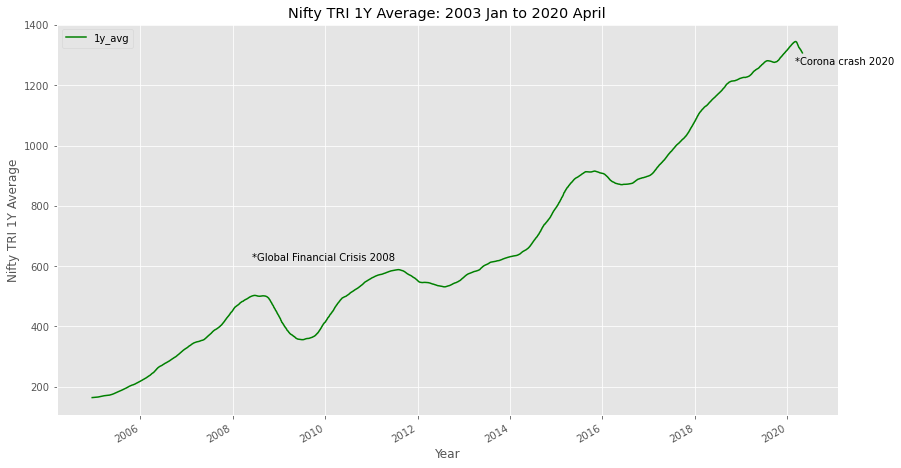

In [38]:
# to plot the 1Y average chart of Nifty 50 TRI

# creating new dataframe with required columns
graphdf=df_nifty_tri_1y[['Date','1y_avg']]
graphdf.set_index('Date').plot(kind='line',figsize=(14,8),color='green')
plt.title('Nifty TRI 1Y Average: 2003 Jan to 2020 April')
plt.xlabel('Year')
plt.ylabel('Nifty TRI 1Y Average')
plt.text('2008-06-01',620,'*Global Financial Crisis 2008')
plt.text('2020-03-01',1270,'*Corona crash 2020')
plt.savefig('pic06.png')
plt.show()

**Observation**:
  
AS expected, the graph has been less volatile compared to the plot with daily values.

In [19]:
# Creating 2 columns: 1Y return and Direction
df_nifty_tri_1y['1y_retn']=""
df_nifty_tri_1y['Direction']=""

# calculating 1Y return for each row starting row number 248+249
# 248 is the current starting index, 249 is the supposed count of trading days in 1Y
for i in range(497, var_rows):
    df_nifty_tri_1y.loc[i,'1y_retn']=((df_nifty_tri_1y.loc[i,'1y_avg']/df_nifty_tri_1y.loc[i-249,'1y_avg'])-1)*100
    if (df_nifty_tri_1y.loc[i,'1y_retn']>0):
        df_nifty_tri_1y.loc[i,'Direction']='Advanced'
    else:
        df_nifty_tri_1y.loc[i,'Direction']='Declined'

# loop to drop rows empty on col 1y_avg. If commented for testing, Uncomment on fresh run
for i in range(248,497):
    df_nifty_tri_1y=df_nifty_tri_1y.drop(index=i)
df_nifty_tri_1y.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,1y_avg,1y_retn,Direction
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28,1311.19,5.09488,Advanced
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25,1310.11,4.95632,Advanced
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81,1309.14,4.83272,Advanced
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97,1308.27,4.71859,Advanced
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75,1307.47,4.60463,Advanced


# Analysis 6: Increasing duration on top of averaging
Let’s see what would happen if we calculate changes of longer duration instead of daily changes.  
  
At first, we will calculate the 1Y return of the Nifty TRI 1Y average.  

What does this mean in real life? It means we are buying every day for 1 year and immediately start selling every day for the next year. The total duration for one observation is 2 years, where each purchase is held for 1 Year. For example, to calculate 1Y return on 1Y average of an index as on 2006-Dec-31: We analyze the case when we buy throughout 2005 (hence we bought it at the average price of 2005) and sell throughout 2006 (we got the average price of 2006).  
  
From our data, we can compute all possible dates where this 2-year strategy is possible and analyze further.  
  
Let’s look into the direction of 1Y return on 1Y average using a Pie chart:

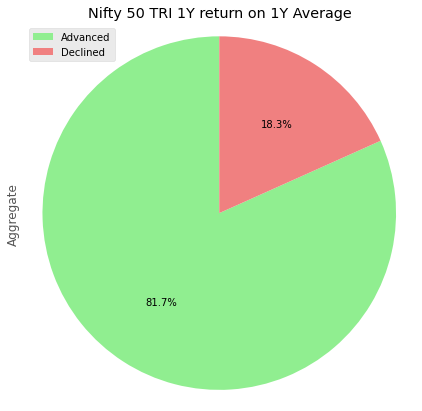

In [20]:
# to plot Advances vs Declines of Nifty 50 TRI 1Y return on 1Y average

# counting number of Advanced, Declined days
count_adv=len(df_nifty_tri_1y[df_nifty_tri_1y['Direction']=='Advanced'])
count_dec=len(df_nifty_tri_1y[df_nifty_tri_1y['Direction']=='Declined'])

# creating a 2D list graph3
graphlist=[['Advanced',count_adv],['Declined',count_dec]]

# creating a dataframe graph3df with the 2D list created
graphdf = pd.DataFrame(graphlist, columns = ['Change', 'Aggregate'])
# plotting the Pie chart
colors_list = ['lightgreen', 'lightcoral']
graphdf.set_index('Change')['Aggregate'].plot(kind='pie',figsize=(7,7),autopct='%1.1f%%',labels=None,colors=colors_list,startangle=90)
plt.title('Nifty 50 TRI 1Y return on 1Y Average')
plt.axis('equal')
plt.legend(labels=graphdf['Change'], loc='upper left') 
plt.savefig('pic07.png')
plt.show()


We have managed to get 81.7% of positive returns with this strategy, however, as we saw earlier, we should look deeper into the magnitude of change before concluding.

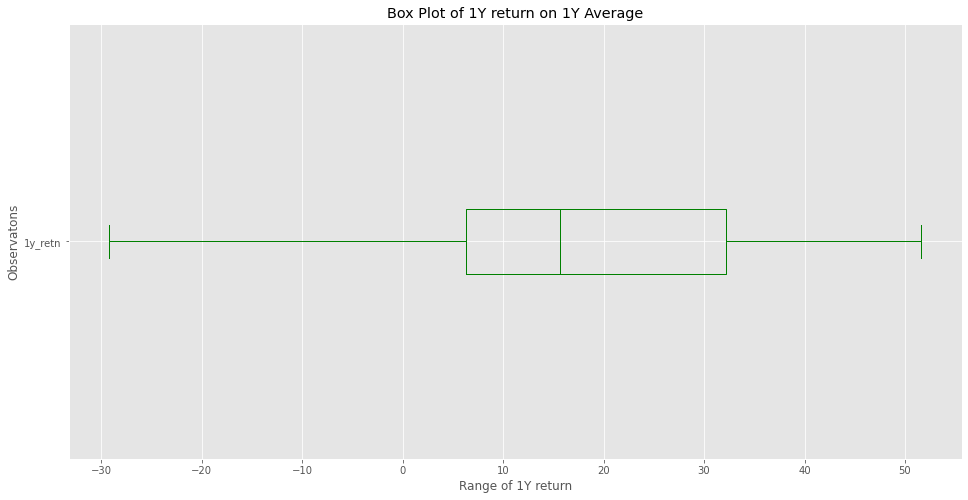

In [21]:
# to draw Boxplot of 1Y returns of 1Y average values

graphdf=df_nifty_tri_1y[['Date','1y_retn']]
graphdf.set_index('Date')['1y_retn'].plot(kind='box',figsize=(16,8),color='green',vert=False)
plt.title('Box Plot of 1Y return on 1Y Average')
plt.xlabel('Range of 1Y return')
plt.ylabel('Observatons')
plt.savefig('pic08.png')
plt.show()

In [22]:
# print median, first quartile and 3rd quartile

boxmedian=np.median(df_nifty_tri_1y[['1y_retn']])
boxfirst=np.percentile(df_nifty_tri_1y[['1y_retn']], 25)
boxthird=np.percentile(df_nifty_tri_1y[['1y_retn']], 75)
boxmin=np.percentile(df_nifty_tri_1y[['1y_retn']], 0)
boxmax=np.percentile(df_nifty_tri_1y[['1y_retn']], 100)
print("First Quartile:",str(boxfirst),
      "\nMedian:",str(boxmedian),
      "\nThird Quartile:",str(boxthird),
     "\nMinimum:",str(boxmin),
     "\nMaximum:",str(boxmax))


First Quartile: 6.329283251998485 
Median: 15.654264415735653 
Third Quartile: 32.18124528914916 
Minimum: -29.202635809640633 
Maximum: 51.586490228196546


**Observations**:
  
    The median range of the strategy return is 15.65%
    50% of the observations are between 6.33% and 32.18%
    All of the observations are in the range -29.2% to 51.59% (there were no outliers)

**Takeaways**:

    Averaging is an effective way to reduce volatility.
    By holding the investments for longer, the probability of loss reduces significantly
    The Presence of losses of upto 30% indicates that there is a scope for further improvement.


**Next, we will tweak the above method to analyze 5Y return on 3Y average**  
  
What does this mean in real life? It means we are buying every day for 3 years, then hold everything for the next 2 years and then start selling every day for the next 3 years. The total duration for one observation is 8 years, where each purchase is held for 5 years. For example, to calculate 5Y return on 3Y average of an index as on 2013-Dec-31: we analyze the case when we start buying from 2006-Jan-01 to 2008-Dec-31 (hence we bought it at the average price of 2006 to 2008) hold it for 2009 and 2010, and then starts selling from 2011-Jan-01 to 2013-Dec-31 (we got the average price of 2011 to 2013 ).  
  
From our data, we can compute all possible dates where this 8-year strategy is possible and analyze further.  
  
Let’s make a chart with 3Y average values of Nifty TRI

In [23]:
# creating new dataframe for 3 year average

# copying total return index
df_nifty_tri_3y=df_nifty_tri.copy()

# adding new empty column 3y_avg
df_nifty_tri_3y['3y_avg']=""

# working out 4302 rows for 17 years and 4 months; on average 248.19 trading days are in an year
# calculating rolling 3Y average on every day starting 745th row
for i in range(745, var_rows):
    df_nifty_tri_3y.loc[i,'3y_avg']=np.mean(df_nifty_tri_3y.loc[i-745:i,'NiftyTRI'])
    
df_nifty_tri_3y.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,3y_avg
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28,1232.31
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25,1232.39
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81,1232.49
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97,1232.6
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75,1232.77


In [24]:
# droping first 745 rows as they don't have the field 3y_avg

# loop to drop rows empty on col 3y_avg Uncomment on fresh run
for i in range(745):
    df_nifty_tri_3y=df_nifty_tri_3y.drop(index=i)
df_nifty_tri_3y.head()


,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,3y_avg
745,2005-12-14,2804.55,1.59,254.924,0.179669,271.194,163.57
746,2005-12-15,2778.55,1.61,252.561,0.180242,268.697,163.796
747,2005-12-16,2810.15,1.59,255.433,0.180027,271.77,164.027
748,2005-12-19,2842.60,1.56,258.383,0.17867,274.926,164.263
749,2005-12-20,2826.20,1.57,256.892,0.178778,273.357,164.497


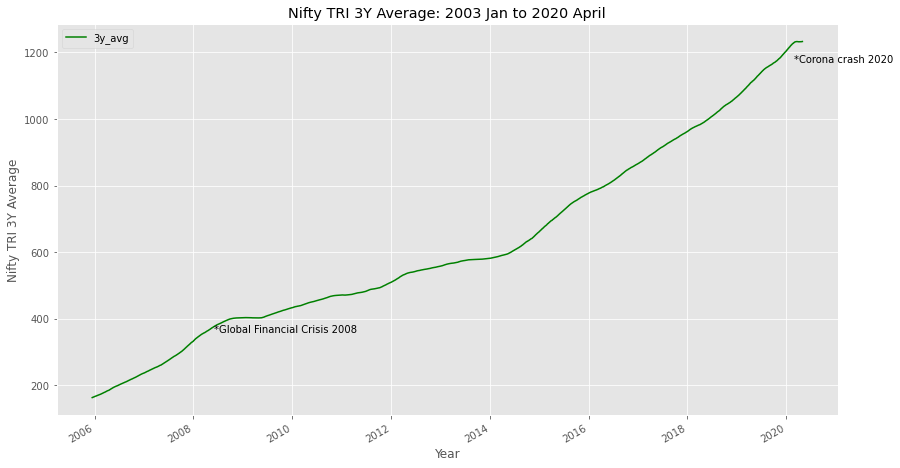

In [25]:
# to plot 3Y average chart on Nifty TRI

# creating new dataframe with required columns
graphdf=df_nifty_tri_3y[['Date','3y_avg']]
graphdf.set_index('Date').plot(kind='line',figsize=(14,8),color='green')
plt.title('Nifty TRI 3Y Average: 2003 Jan to 2020 April')
plt.xlabel('Year')
plt.ylabel('Nifty TRI 3Y Average')
plt.text('2008-06-01',360,'*Global Financial Crisis 2008')
plt.text('2020-03-01',1170,'*Corona crash 2020')
plt.savefig('pic09.png')
plt.show()

We can see that the graph is more smoothened and dips are barely visible.

**Next, calculate 5Y returns on all possible days in the above and plot the direction in a Pie Chart**

In [26]:
# Creating 2 columns: 5Y return and Direction

df_nifty_tri_3y['5y_retn']=""
df_nifty_tri_3y['Direction']=""

# calculating 5Y return for each row starting row number 745+1241
# 745 is the current starting index, 1241 is the supposed count of trading days in 5 Years
# to get CAGR, ((5th year value)/(starting value))^(1/5) is done
for i in range(1986, var_rows):
    df_nifty_tri_3y.loc[i,'5y_retn']=(((df_nifty_tri_3y.loc[i,'3y_avg']/df_nifty_tri_3y.loc[i-1241,'3y_avg'])**0.2)-1)*100
    if (df_nifty_tri_3y.loc[i,'5y_retn']>0):
        df_nifty_tri_3y.loc[i,'Direction']='Advanced'
    else:
        df_nifty_tri_3y.loc[i,'Direction']='Declined'

df_nifty_tri_3y.tail()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,3y_avg,5y_retn,Direction
4297,2020-04-24,9154.40,1.66,832.105,0.612279,1066.28,1232.31,12.0457,Advanced
4298,2020-04-27,9282.30,1.64,843.73,0.613354,1081.25,1232.39,12.0295,Advanced
4299,2020-04-28,9380.90,1.62,852.693,0.61231,1092.81,1232.49,12.0137,Advanced
4300,2020-04-29,9553.35,1.59,868.368,0.612018,1112.97,1232.6,11.9986,Advanced
4301,2020-04-30,9859.90,1.54,896.232,0.611794,1148.75,1232.77,11.9847,Advanced


In [27]:
# loop to drop rows empty on col 5y_retn. If commented for testing, Uncomment on fresh run
for i in range(745,1986):
    df_nifty_tri_3y=df_nifty_tri_3y.drop(index=i)
df_nifty_tri_3y.head()

,Date,Nifty,Div Yield,Nifty_Base_100,Div_add,NiftyTRI,3y_avg,5y_retn,Direction
1986,2010-12-15,5892.30,1.06,535.591,0.251653,606.291,471.163,23.5644,Advanced
1987,2010-12-16,5948.75,1.05,540.722,0.251667,612.125,471.192,23.5318,Advanced
1988,2010-12-20,5947.05,1.05,540.567,0.251595,611.976,471.218,23.4983,Advanced
1989,2010-12-21,6000.65,1.04,545.439,0.251445,617.518,471.253,23.4647,Advanced
1990,2010-12-22,5984.40,1.04,543.962,0.250764,615.872,471.268,23.4303,Advanced


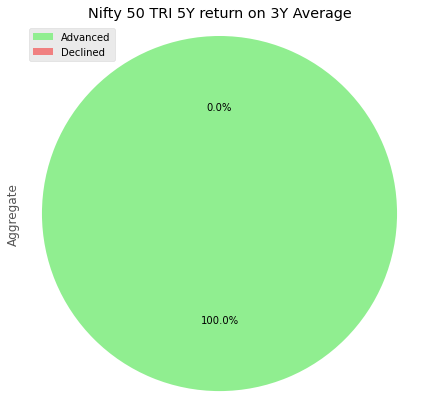

In [28]:
# to plot Advances vs Declines of Nifty 50 TRI 5Y return on 3Y average

# counting number of Advanced, Declined days
count_adv=len(df_nifty_tri_3y[df_nifty_tri_3y['Direction']=='Advanced'])
count_dec=len(df_nifty_tri_3y[df_nifty_tri_3y['Direction']=='Declined'])

# creating a 2D list graphlist
graphlist=[['Advanced',count_adv],['Declined',count_dec]]

# creating a dataframe graph3df with the 2D list created
graphdf = pd.DataFrame(graphlist, columns = ['Change', 'Aggregate'])
# plotting the Pie chart
colors_list = ['lightgreen', 'lightcoral']
graphdf.set_index('Change')['Aggregate'].plot(kind='pie',figsize=(7,7),autopct='%1.1f%%',labels=None,colors=colors_list,startangle=90)
plt.title('Nifty 50 TRI 5Y return on 3Y Average')
plt.axis('equal')
plt.legend(labels=graphdf['Change'], loc='upper left') 
plt.savefig('pic10.png')
plt.show()

We have managed to eliminate loss with this strategy

**Now let’s look into the Boxplot.**

Note that the return has been converted to ‘per year return’ or Compounded Annualized Growth Rate (CAGR) so that it is easy to understand (e.g. 8% return per year is more understandable than 47% return in 5 years)

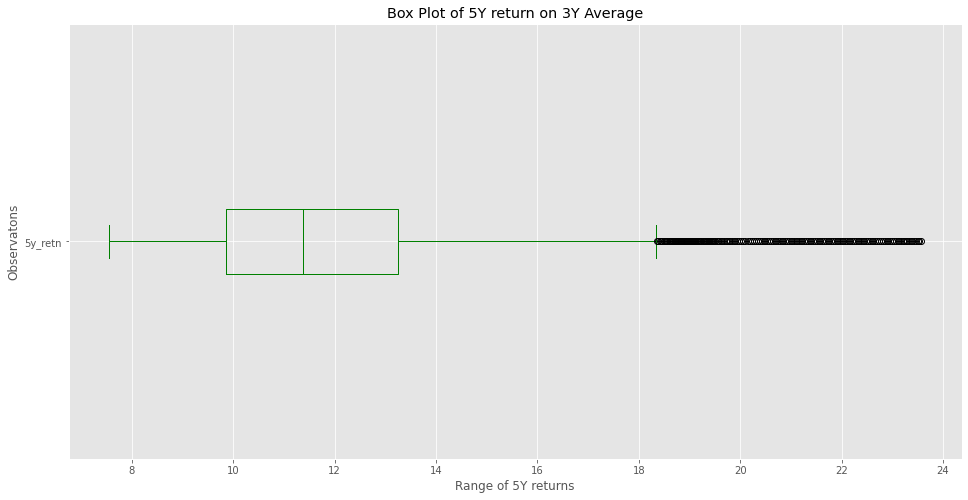

In [29]:
# to draw Boxplot of 5Y returns of 3Y average values

graphdf=df_nifty_tri_3y[['Date','5y_retn']]
graphdf.set_index('Date')['5y_retn'].plot(kind='box',figsize=(16,8),color='green',vert=False)
plt.title('Box Plot of 5Y return on 3Y Average')
plt.xlabel('Range of 5Y returns')
plt.ylabel('Observatons')
plt.savefig('pic11.png')
plt.show()

We have some outliers in the higher side of return, let’s plot another Boxplot excluding outliers

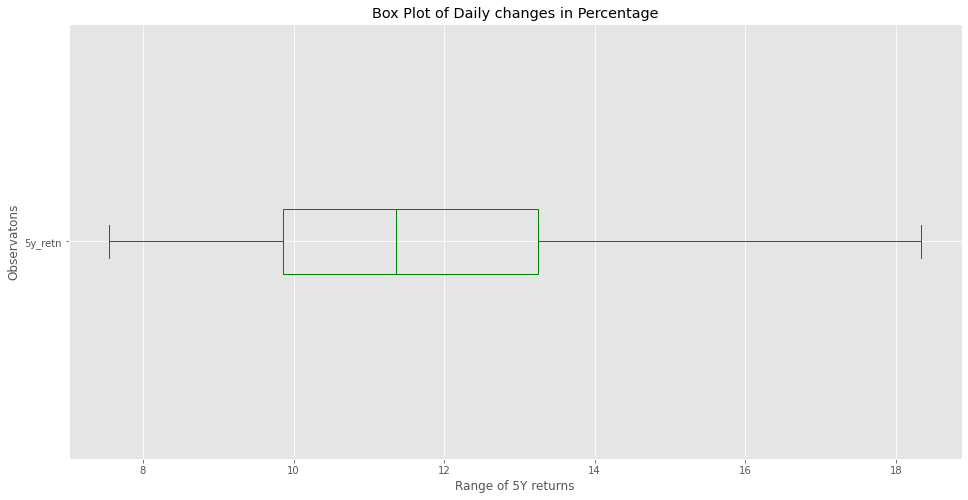

In [30]:
# to draw Boxplot of 5Y returns of 3Y average values excluding outliers

graphdf=df_nifty_tri_3y[['Date','5y_retn']]
graphdf.set_index('Date')['5y_retn'].plot(kind='box',figsize=(16,8),color='green',vert=False,showfliers=False)
plt.title('Box Plot of Daily changes in Percentage')
plt.xlabel('Range of 5Y returns')
plt.ylabel('Observatons')
plt.savefig('pic12.png')
plt.show()

In [31]:
# print median, first quartile and 3rd quartile

boxmedian=np.median(df_nifty_tri_3y[['5y_retn']])
boxfirst=np.percentile(df_nifty_tri_3y[['5y_retn']], 25)
boxthird=np.percentile(df_nifty_tri_3y[['5y_retn']], 75)
boxmin=np.percentile(df_nifty_tri_3y[['5y_retn']], 0)
boxmax=np.percentile(df_nifty_tri_3y[['5y_retn']], 100)
print("First Quartile:",str(boxfirst),
      "\nMedian:",str(boxmedian),
      "\nThird Quartile:",str(boxthird),
     "\nMinimum:",str(boxmin),
     "\nMaximum:",str(boxmax))


First Quartile: 9.859421943052194 
Median: 11.36533871441996 
Third Quartile: 13.249925015022528 
Minimum: 7.5520515022952095 
Maximum: 23.564409481072634


**Observations**:

    The median value of return from the strategy is 11.37%
    50% of the observations are between 9.86% to 13.25%
    Majority of the observations are between 8% to 18%
    Minimum and maximum returns are 7.55% and 23.56% respectively.

**Takeaways**:

    By spreading out investments, withdrawals to 3 years and increasing holding period to 5 years, one could manage to avoid -ve returns altogether for the period 2003-Jan-01 to 2020-Apr-30
    The long term returns are distributed in a tight range in this strategy compared to the last one. 50% of observations fall in a 3.39% range (9.86% to 13.25%), which is similar to the range in which SBI Fixed deposit rates varied in the last 8 years (5.7% to 9%)
